In [ ]:
!pip install gpytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 5.7 MB/s eta 0:00:00


In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import numpy


Datos de entrenamiento

In [ ]:
train_x = torch.tensor([0.50349,0.4952,0.6782,0.8672,0.7992,0.37129,0.35568,0.28391,0.46691,0.94791,0.69391,0.89791,0.78991,0.59091,0.2102,0.8592,0.5592,0.9972,0.5834,0.7972,0.9142,0.94921,0.7342,0.7662,0.9842,0.7012,0.83716,0.37016,0.35816,0.52216,0.70116,0.74526,0.59116,0.62039,1.0024,0.6104,0.35819,0.45138,0.55239,0.75039,0.82238,0.95039,0.34039,0.8104,0.61191,0.54891,1.02991,0.42291,0.70191,0.68591,0.93291,0.74991,0.46891,0.95991,0.8412,0.5632,0.8292,0.57921,0.8652,0.8592,0.58621,0.4892,0.68921,0.32416,0.18516,0.68116,0.92116,0.42816,0.69916,0.57516,0.51116,0.64116,0.35116,0.34916,0.35486,0.87116,0.92516,0.4194,0.89038,0.48038,0.58038,0.80538,0.66438,0.74538,0.7364,0.37039,0.85039,0.21938,0.64739,0.60038,0.76039,0.47039,0.49791,0.50791,0.58791,0.69992,0.76191,0.78891,0.40591,0.80892,0.58392,0.72091,0.83791,0.80691,0.50016,0.53316,0.82116,0.12516,0.44316,0.68339,0.72639,0.40439,0.69038,0.57639,0.72039,0.55091,0.8489,0.43591,0.30191,0.58119,0.34621,0.3312,0.44939,0.2916,0.46109,0.63291,0.26891,0.92591,0.62591,0.60891,0.57891,0.7202,0.7672,0.3682,0.8492,0.77721,0.58421,0.5892,0.7692,0.5142,0.63821,0.43521,0.58421,0.66259,0.62116,0.41616,0.45117,0.73316,0.74116,0.34916,0.51416,0.64339,0.4704,0.26338,0.7424,0.91039,0.3374,0.98339,0.81338,0.8174,0.96038,0.75639,0.87891,0.80991,0.62791,0.93491,0.69791,0.76791,0.86491,0.51491,0.47091,0.92891,0.6312,0.6162,0.5652,0.55819,0.7362,0.2622,0.7622,0.8592,0.5592,0.48016,0.92116,0.47516,0.89216,0.63116,0.73516,0.41816,0.53516,0.73416,0.60916,0.70116,0.98216,0.75816,0.64339,0.51539,0.80538,0.80039,0.71538,0.76639,0.90139,0.71839,0.57938,0.96038,0.64839,0.93639,0.46138,0.67039,0.24639,0.63892,0.53591,0.77391,0.37091,0.69992,0.37391,0.85391,0.60392,0.53491,0.40091,0.37191,0.84091,0.53216,0.93116,0.55316,0.84116,0.72739,0.44238,0.2824,0.5194,1.06039,0.26838,0.2504,0.69892,0.73091,0.99891,0.40991,0.12694,0.25609,0.08848,0.11797,0.18322,0.1407,0.15186,0.09401,0.28662,0.26349,0.1431,0.16035,0.12303,0.12608,0.17315,0.16431,0.1599,0.24448,0.24835,0.27544,0.33051,0.33103,0.16059,0.21887,0.11991,0.17839,0.27923,0.18581,0.06641,0.258,0.2798,0.26576,0.185,0.05715,0.3264,0.10886,0.20323,0.37986,0.2116,0.21353,0.14409,0.25249,0.25672,0.21885,0.07883,0.08282,0.17028,0.2367,0.30569,0.08254,0.18891,0.08141,0.25655,0.12622,0.10264,0.12455,0.37046,0.20215,0.1799,0.1618,0.22669,0.29683,0.25029,0.14882,0.14729,0.21513,0.14478,0.13243,0.21975,0.38492,0.174,0.17789,0.29936,0.11845,0.17653,0.24552,0.19611,0.24852,0.30632,0.24637,0.13514,0.21054,0.2363,0.17851,0.22068,0.31494,0.18443,0.26129,0.18123,0.38048,0.18481,0.20847,0.17706,0.31582,0.24973,0.20368,0.12336,0.20318,0.15339,0.33439,0.1958,0.24973,0.15509,0.15596,0.15837,0.30938,0.24857,0.18507,0.18376,0.18079,0.17696,0.17768,0.0718,0.13811,0.1696,0.24555,0.14387,0.25191,0.03743,0.27749,0.28746,0.19867,0.15999,0.21075,0.23775,0.15517,0.09391,0.15271,0.25722,0.21226,0.2454,0.13696,0.32569,0.10638,0.40127,0.18931,0.19726,0.12837,0.12262,0.12715,0.21323,0.21099,0.26856,0.20453,0.2701,0.24185,0.29114,0.35346,0.28543,0.21955,0.17558,0.23542,0.15325,0.21005,0.29135,0.31376,0.13687,0.29567,0.30394,0.20557,0.1219,0.17428,0.24883,0.24558,0.13833,0.24315,0.24267,0.31468,0.27573,0.30041,0.21728,0.20335,0.19025,0.29021,0.22786,0.31065,0.13729,0.08784,0.08504,0.19009,0.09227,0.12903,0.26166,0.26162,0.19422,0.14703,0.21179,0.17958,0.19029,0.3388,0.11741,0.2889,0.26405,0.24961,0.22967,0.08543,0.27656,0.36193,0.30021,0.11635,0.15492,0.25037,0.25174,0.12928,0.30929,0.29888,0.27091,0.29353,0.18979,0.12376,0.31288,0.30915,0.20267,0.21163,0.1789,0.30354,0.21457,0.32045,0.21835,0.07523,0.2576,0.18468,0.11628,0.06481,0.10288,0.04437,0.16595,0.16817,0.17063,0.12042,0.13868,0.2338,0.24643,0.22286,0.17915,0.19718,0.22916,0.26451,0.10337,0.21338,0.15653,0.2434,0.23652,0.20852,0.25104,0.22534,0.28742,0.32984,0.24603,0.11966,0.32931,0.21082,0.20308,0.28436,0.18037,0.2607,0.14792,0.32793,0.24206,0.22334,0.1828,0.15304,0.13818,0.20735,0.20313,0.19801,0.22256,0.2734,0.18651,0.15935,0.21935,0.17373,0.24436,0.13353,0.28332,0.17383,0.19654,0.36952,0.20548,0.17357,0.12688,0.28434,0.19392,0.10018,0.37425,0.11771,0.19176,0.23684,0.15899,0.07877,0.13864,0.23381,0.15689,0.08806,0.13045,0.18203,0.25625,0.21674,0.14533,0.13639,0.20515,0.36976,0.1294,0.26687,0.27822,0.17483,0.11364,0.11242,0.15317,0.19671,0.18914,0.17625,0.21757,0.18563,0.16356,0.25721,0.12164,0.16455,0.19862,0.26821,0.40128,0.14581,0.05573,0.22452,0.28655,0.18388,0.10351,0.33136,0.21865,0.26357,0.16284,0.10683,0.16477,0.1075,0.12899,0.05948,0.04093,0.01705,0.01531,0.01472,0.02673,0.01732,0.04437,0.01567,0.02477,0.038,0.0299,0.01012,0.0258,0.01038,0.03791,0.03507,0.01268,0.02525,0.01908,0.03489,0.0295,0.03416,0.04067,0.07515,0.05581,0.02529,0.03501,0.02846,0.0328,0.03378,0.04597,0.04341,0.05684,0.02024,0.03191,0.0415,0.02639,0.02651,0.02689,0.02349,0.05067,0.04093,0.06877,0.01754,0.02557,0.02189,0.03155,0.06845,0.02249,0.04949,0.03161,0.03434,0.04486,0.01531,0.03048,0.03837,0.03682,0.0221,0.01402,0.0589,0.05895,0.06888,0.0204,0.02894,0.02384,0.01451,0.03292,0.06455,0.01663,0.05359,0.03163,0.02751,0.02559,0.02401,0.03713,0.03408,0.02454,0.01697,0.01629,0.03184,0.037,0.02932,0.0174,0.03578,0.02845,0.05035,0.04269,0.03212,0.02752,0.03049,0.01724,0.07063,0.05344,0.02878,0.03518,0.03348,0.04651,0.06119,0.04714,0.0212,0.04028,0.03863,0.03314,0.02414,0.02837,0.01043,0.02038,0.0471,0.03984,0.0122,0.01271,0.01763,0.02171,0.01572,0.01972,0.01678,0.01226,0.05322,0.03055,0.03001,0.01506,0.0153,0.04713,0.03411,0.0152,0.01504,0.02763,0.03359,0.01447,0.02547,0.01082,0.01741,0.02031,0.04819,0.02223,0.02811,0.05458,0.05721,0.02091,0.01454,0.0431,0.03273,0.03399,0.01382,0.05092,0.01752,0.02482,0.0288,0.01568,0.02197,0.03426,0.01698,0.02752,0.03438,0.01318,0.01726,0.01209,0.05418,0.0197,0.01662,0.02398,0.03144,0.01291,0.03827,0.01532,0.02643,0.0202,0.0373,0.02348,0.01635,0.02275,0.2305,0.3812,0.2534,0.1526,0.4365,0.1023,0.3712,0.4661,0.1959,0.3112,0.0322,0.1098,0.2255,0.2604,0.2253,0.4474,0.4399,0.3374,0.5283,0.5761,0.3876,0.36,0.347,0.4391,0.3492,0.4305,0.5088,0.2888,0.1727,0.318,0.2752,0.103,0.2049,0.2647,0.2348,0.2145,0.4276,0.4019,0.3218,0.4512,0.1612,0.3512,0.2492,0.0822,0.1056,0.3327,0.1022,0.2928,0.1326,0.2707,0.1004,0.3536,0.4235,0.3001,0.1476,0.2288,0.1388,0.1436,0.0919,0.1568,0.2388,0.1496,0.5078,0.2528,0.2842,0.2368,0.3412,0.2641,0.349,0.3212,0.1352,0.3065,0.2335,0.3006,0.3676,0.1692,0.07976,0.1806,0.1806,0.2307,0.04582,0.2212,0.2006,0.0755,0.02627,0.1912,0.1777,0.1852,0.3491,0.2712,0.2921,0.3704,0.0963,0.1808,0.2748,0.2454,0.3618,0.2318,0.1466,0.1592,0.4198,0.3192,0.5196,0.1506,0.3026,0.2106,0.2396,0.3316,0.2006,0.3606,0.2426,0.2212,0.1206,0.3412,0.2504,0.3804,0.3106,0.1994,0.24,0.5027,0.3701,0.27,0.2631,0.268,0.308,0.25,0.2804,0.3148,0.3288,0.3297,0.2588,0.2246,0.2102,0.3878,0.3068,0.3652,0.2488,0.2988,0.1238,0.3312,0.3826,0.2406,0.1712,0.2088,0.2896,0.2457,0.1361,0.1505,0.1187,0.2448,0.3503,0.6192,0.2196,0.0994,0.4098,0.5025,0.3815,0.2797,0.2307,0.4269,0.5501,0.3253,0.3509,0.3283,0.4504,0.06441,0.06559,0.3185,0.1453,0.1396,0.4294,0.2166,0.3666,0.3806,0.4206,0.1996,0.5106,0.4267,0.3156,0.5779,0.4812,0.3922,0.1735,0.3302,0.2996,0.2296,0.2927,0.2085,0.2749,0.3032,0.359,0.36,0.349,0.6304,0.3207,0.51,0.3669,0.1384,0.1792,0.1717,0.2708,0.3473,0.4796,0.3192,0.5192,0.3802,0.3712,0.1808,0.2236,0.1412,0.3055,0.4045,0.2856,0.3012,0.2637,0.5006,0.3051,0.3857,0.1985,0.0906,0.4774,0.3312,0.4712,0.3306,0.2607,0.07141,0.1812,0.3379,0.1221,0.2501,0.1604,0.2988,0.3892,0.2928,0.3288,0.3056,0.2858,0.4292,0.1792,0.1896,0.2488,0.4096,0.2416,0.3376,0.0706,0.3456,0.3306,0.05495,0.4231,0.1072,0.2854,0.3254,0.3347,0.2907,0.4404,0.2411,0.4607,0.1194,0.545,0.4114,0.2688,0.04976,0.4118,0.07369,0.3188,0.4198,0.4208,0.4392,0.4804,0.1998,0.3018,0.2902,0.3092,0.2956,0.3386,0.3782,0.0896,0.4507,0.4604,1.206,1.33,1.54,1.55,1.7,1.8,2.26,1.914,1.3,1.34,1.02,0.735,1.12,1.23,1.23,0.854,1.37,0.9752,0.97,0.74,1.39,1.305,0.935,1.014,1.315,1.092])
train_y = torch.tensor([22.93445,22.8802,24.0377,24.34685,24.3605,22.28785,22.05915,21.40915,23.21635,24.41155,23.79645,24.40275,24.2188,23.3354,20.64495,24.1237,23.1648,24.69965,23.34385,23.85445,24.37895,24.66675,23.8481,24.10805,24.828,23.7492,24.1545,22.1401,21.95965,23.15915,23.7115,23.8056,23.2429,23.5114,25.0798,23.47615,21.9694,22.4159,22.98515,23.763,24.3356,24.68515,21.9463,24.0795,23.7392,22.8926,24.7289,22.35675,23.90875,23.844,24.54795,23.81055,22.73255,24.80665,24.22255,23.2428,24.39785,23.22495,24.3693,24.4442,23.5694,22.8653,23.6132,21.79365,20.4558,23.59755,24.355,22.751,23.95255,23.38495,23.11305,23.62155,22.2272,22.14445,22.23665,24.3402,24.7687,22.59095,24.1804,22.7752,23.36785,24.09575,23.6337,24.00735,23.77845,22.04575,24.31865,20.8469,23.6259,23.4022,23.92525,22.804,22.9275,22.9705,23.44375,23.77905,24.05415,24.1069,22.564,24.55735,23.6081,24.0226,24.3054,24.2544,23.0505,22.9345,24.1676,19.4684,22.57415,23.9441,23.90005,22.44625,23.7527,23.2437,23.87645,23.16815,24.3105,22.36675,21.64245,23.52355,22.11525,21.7829,22.78895,21.47215,22.62945,23.66065,21.1762,24.7416,23.46015,23.3767,23.2373,23.82525,24.24705,22.24455,24.33175,24.0942,23.2686,23.30085,24.2078,23.12745,23.37,22.5623,23.46355,23.74875,23.4108,22.5154,22.36265,24.04855,24.26275,21.74,23.18845,23.60755,22.65205,21.15515,23.92255,24.6116,21.9137,24.92305,24.26675,24.3431,24.5736,24.03965,24.42165,24.20795,23.4134,24.7653,23.78265,24.3849,24.39625,22.98745,23.1005,24.7789,23.4092,23.56625,23.2891,23.2494,24.06925,21.15835,23.97575,24.54425,23.6061,22.74835,24.57175,22.6952,24.5781,23.1617,24.02845,22.38625,22.98355,24.09175,23.5447,23.8387,24.78095,24.0557,23.6045,23.02365,24.0139,23.82255,23.84395,24.2307,24.5128,23.68915,23.1779,24.80925,23.53665,24.4717,22.76265,23.78495,21.16055,23.49005,23.06945,24.17605,22.15255,23.88895,22.11185,24.3052,23.58805,22.9223,22.2601,22.20135,24.0253,23.059,24.704,23.2838,24.3261,23.8687,22.67285,21.5746,23.03865,24.6873,21.24725,21.1763,23.7924,23.7684,24.6122,22.451,19.5429,21.3344,18.64345,19.19345,20.2951,19.871,19.7933,18.889,21.6827,21.3576,19.79675,19.9329,19.3948,19.36855,20.15345,20.03175,19.92285,20.86815,20.98175,21.37075,21.9321,21.82885,19.98615,20.87005,19.36835,20.72835,21.50115,20.48365,17.9881,21.2775,21.2773,21.0609,20.37525,17.65695,21.6733,19.1721,20.7001,22.13745,20.68915,20.78295,19.83575,21.1678,21.2758,20.976,18.5397,18.7438,20.2489,20.87655,21.3803,18.5179,20.2039,18.511,21.2564,19.58525,19.16175,19.4784,22.46065,20.38595,20.68245,20.1359,20.8771,21.4449,21.20115,19.91815,19.776,21.20185,19.8106,19.9293,21.00055,22.40575,20.3461,20.20345,21.51975,19.44875,20.2397,21.3752,20.54825,21.09655,21.77705,21.1569,19.9671,20.6402,21.1547,20.37535,20.81795,21.8201,20.55175,21.2036,20.21145,22.03255,20.38765,20.65465,20.33625,21.7168,21.1676,20.6509,19.4198,20.64385,20.1226,21.9349,20.5286,21.0769,20.0251,19.98785,19.81685,21.8114,21.1261,20.31575,20.5074,20.37965,20.28545,20.0718,18.0121,19.66285,20.46515,20.7198,19.81665,21.2338,16.7708,21.8807,21.2668,20.61015,20.07605,21.0136,21.0147,20.14265,18.94955,20.08555,21.2741,20.80065,20.88445,19.76485,21.9051,19.09035,22.30585,20.4864,20.4352,19.5616,19.44025,19.59325,20.67635,20.727,21.4883,20.66435,21.2859,20.98075,21.236,21.81675,21.60225,20.6719,20.24765,20.9929,19.99965,20.90475,21.51945,21.8225,19.7402,21.7708,21.49625,20.73155,19.34125,20.2369,21.2028,21.1159,19.8495,21.02795,21.18455,21.3618,21.4485,21.4204,20.89395,20.5734,20.4061,21.3714,20.83435,21.45975,20.12265,18.6796,18.62285,20.6486,18.8576,19.58985,21.1668,21.4559,20.61715,19.83975,21.14485,20.30175,20.6928,21.7897,19.41925,21.5295,21.2679,21.38165,20.8794,18.608,21.62545,22.1744,21.62535,19.38465,19.83105,21.2982,21.209,19.5471,21.72385,21.66705,21.3419,21.57975,20.46505,19.4023,21.63085,21.83605,20.60265,20.6247,20.4025,21.872,20.8217,21.6956,20.9318,18.2988,21.37115,20.3647,19.29475,17.87655,19.16045,16.92415,19.9345,20.0523,20.12375,19.52005,19.76995,20.92065,21.0223,21.0804,20.2809,20.5818,20.99445,21.45355,19.10195,20.73185,19.944,21.24885,21.2481,20.70195,21.4064,20.861,21.45405,21.65335,21.128,19.65185,22.21015,20.57655,20.7349,21.2982,20.13755,21.31275,19.8403,21.80515,21.3452,20.93075,20.58185,20.0024,19.70325,21.03995,20.64165,20.49105,20.9356,21.30625,20.52515,19.83815,20.8854,20.4812,20.96025,19.59395,21.4441,20.3284,20.70795,22.26255,20.5658,20.28215,19.526,21.474,20.5958,18.95705,22.3047,19.35185,20.5315,21.01435,19.99615,18.7576,19.99935,20.88475,20.02475,18.4809,19.79635,20.3359,21.13985,20.8123,19.90865,19.58645,20.934,22.04745,19.61205,21.33225,21.3866,20.5056,19.1271,19.38095,19.8424,20.7379,20.88525,20.47675,20.7809,20.33785,20.0237,21.34695,19.58065,20.09405,20.6407,21.39935,22.165,19.6731,17.56165,21.16495,21.42305,20.55265,18.96075,22.03,20.76195,21.035,20.2483,19.2184,20.0849,19.24475,19.5083,17.71775,17.0528,14.85645,14.59755,14.6158,15.97105,14.8718,16.72085,14.4307,15.6593,16.7664,16.2413,13.90745,16.1648,14.0496,16.5851,16.45115,14.4486,15.82815,15.3534,16.36835,16.3438,16.57565,16.7928,17.8882,17.23215,15.7896,16.6581,16.0051,16.64085,16.38795,17.2822,16.93145,17.73355,15.2868,16.59205,16.9967,15.93305,16.06745,15.87545,15.6236,17.57225,16.7302,18.16815,14.9841,15.8607,15.53085,16.1279,18.31035,15.56975,17.32405,16.3736,16.61295,17.2055,14.74935,16.25295,16.9021,16.77055,15.7795,14.64805,17.792,17.7707,18.1778,15.7067,16.02685,15.7013,14.89705,16.452,17.78945,15.01385,17.4687,16.21965,15.9978,15.5514,15.78645,16.56045,16.39975,15.6001,14.91335,15.17685,16.34225,16.74885,15.8648,15.26595,16.59205,16.04785,17.2903,16.93325,16.23615,16.0669,16.28725,14.9294,18.05925,17.62205,16.10835,16.42245,16.4802,17.18185,17.9246,17.16275,15.4466,16.8206,16.86145,16.39225,15.68035,16.1044,13.9248,15.42955,16.9842,16.7074,14.4566,14.2811,14.9354,15.502,14.86115,15.27645,14.92685,14.4674,17.57915,15.88935,16.1733,14.6193,14.6705,17.1679,16.515,14.53545,14.69915,16.23455,16.59355,14.6408,15.86575,14.0086,15.1,15.30565,17.4344,15.3918,16.3465,17.4521,17.60445,15.36595,14.99535,16.97675,16.3843,16.35135,14.47835,17.42035,15.0558,15.64995,16.09165,14.7589,15.36745,16.4701,14.6697,16.23595,16.6071,14.55605,14.9156,13.9791,17.3218,15.45455,14.6312,15.8239,16.31895,14.1903,16.99715,14.9486,15.91835,15.02285,16.8196,15.66265,14.8831,15.5348,21.0138,22.52675,21.09145,19.93715,22.84545,19.15365,22.12745,22.7822,20.50135,21.7417,16.472,19.29245,20.723,21.22765,20.8629,22.59905,22.85455,21.74045,22.8422,23.2359,22.3891,21.92755,21.7912,22.56615,21.8575,22.5444,22.7793,21.4826,20.49025,21.8387,21.50715,18.90405,20.5539,21.2449,20.8644,20.73405,23.03515,22.2536,21.54775,22.72345,20.07365,22.05965,21.02715,18.52945,19.1167,22.0508,19.0531,21.4896,19.53775,21.22425,19.0807,22.1458,22.599,21.71085,19.88745,20.96525,19.82205,19.88005,18.9547,20.1239,21.19555,20.15155,22.9937,21.20755,21.3163,21.0224,21.88785,21.064,22.1162,21.71485,19.80745,21.88165,21.21045,21.91835,21.9904,20.2554,18.337,20.3864,20.34675,21.03315,17.29255,20.7853,20.5274,18.378,15.98385,20.055,20.3552,20.5371,22.02925,21.30945,21.17535,21.7944,18.8215,20.2752,21.3734,21.2589,21.9082,20.92185,19.91105,20.18505,22.4583,21.66595,22.97595,19.9375,21.6135,20.73865,20.71895,21.7581,20.72485,22.1621,21.3408,20.82175,19.3688,21.88605,21.0268,22.1535,21.81735,20.3968,21.0934,22.89585,22.10035,21.36745,21.391,21.22475,21.95175,21.3768,21.3787,21.9041,22.1329,21.9869,21.13905,20.6681,20.9208,22.2944,21.6875,22.2065,21.1327,21.39335,19.5741,21.7689,22.18595,21.13115,20.2873,20.859,21.715,21.1466,19.76145,19.8557,19.26765,21.05305,21.9623,23.4834,20.83145,19.1829,22.4668,22.81425,22.31495,21.2969,20.74845,22.5594,23.1391,21.96765,22.00245,21.97245,22.4503,18.09975,17.91255,21.8116,20.2551,19.7799,22.75515,20.59575,21.88675,22.2063,22.47585,20.61175,22.8206,22.6189,21.9342,23.2802,23.0166,22.18855,20.08825,21.9984,21.70345,20.95825,21.54425,20.59295,21.2869,21.66825,22.19585,21.8702,21.98165,23.3169,22.0192,22.84675,22.0067,19.7944,20.54675,20.22,21.2356,22.23255,22.6131,21.9169,22.9578,22.18215,22.13805,20.474,20.75105,19.8422,21.68485,22.12805,21.43725,21.5859,21.2319,22.9717,21.64295,22.28245,20.6442,18.75805,22.9261,21.831,22.70965,21.7726,21.3572,18.15745,20.426,21.91315,19.37365,21.1135,20.16235,21.99485,22.11805,21.4687,21.6655,21.6995,21.46645,22.4792,20.481,20.50025,21.19025,22.48095,20.85675,21.8791,18.48435,21.9593,21.98705,17.60185,22.37855,19.19495,21.2265,21.91925,21.74575,21.30595,22.4238,21.09055,22.75035,19.33475,23.34415,22.6089,21.34225,17.35275,22.5817,18.2355,22.0816,22.16135,22.49015,22.46285,22.68865,20.66375,21.81235,21.4412,21.58775,21.7291,21.88335,22.21555,18.72405,22.6586,22.8011,25.73935,25.6034,25.9072,26.00705,26.0592,26.2011,26.877,26.1609,25.52015,25.4652,24.88235,23.70605,25.0639,25.28615,25.4985,24.3128,25.5159,24.7061,25.11545,23.8446,25.36305,25.2642,24.2666,24.85445,25.54235,24.63835])

## **Matern Kernel**

In [ ]:


# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5, lengthscale=1))

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 3, 500)
    observed_pred = likelihood(model(test_x))



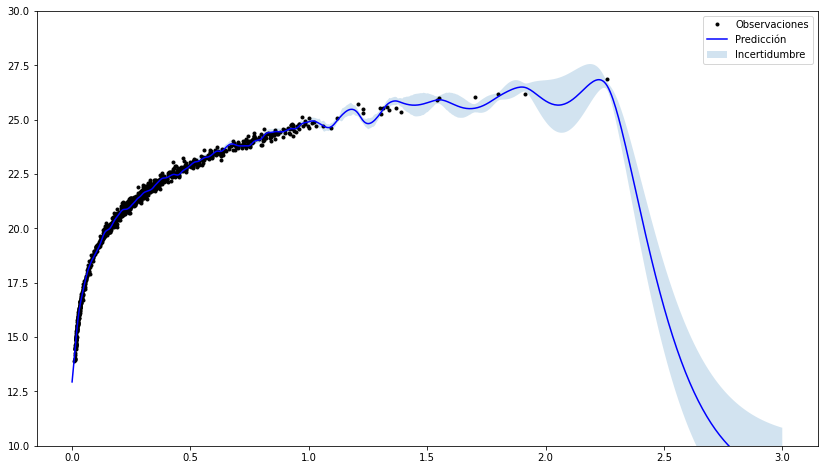

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.ylim((10, 30))
    plt.legend()  
    plt.show()

## **RBF Kernel**

In [ ]:
# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 2.5, 500)
    observed_pred = likelihood(model(test_x))


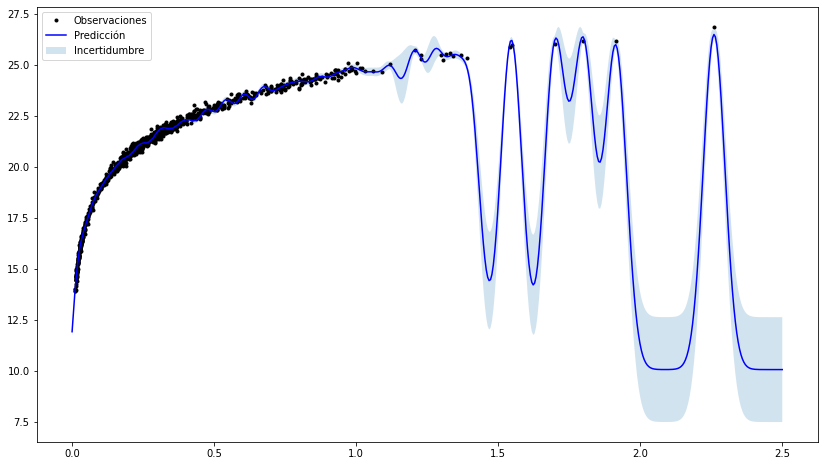

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.legend()  
    plt.show()

## **SpectralMixture Kernel**

In [ ]:
# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=2)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 2.5, 500)
    observed_pred = likelihood(model(test_x))


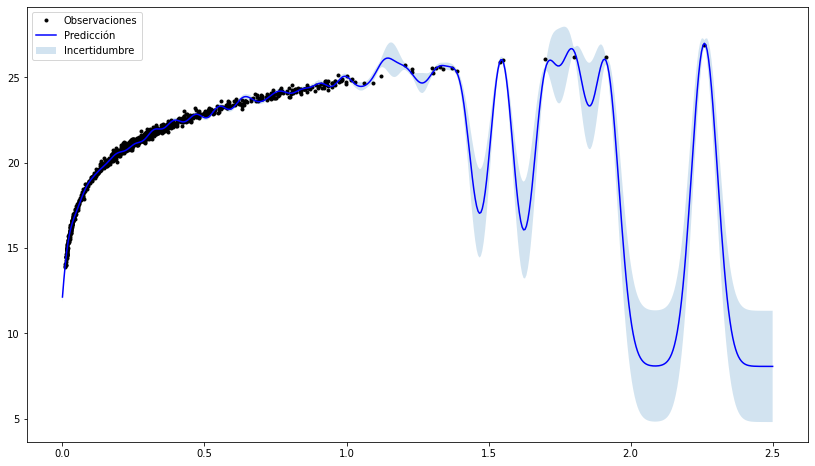

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.legend()  
    plt.show()